In [2]:
!pip install EMD-signal
!pip install vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 910.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PyEMD as pe
from vnstock import *

Observations:  1639
             Open   High    Low  Close   Volume Ticker
Time                                                  
2017-06-02  10590  11040  10510  10950  5519180    SSI
2017-06-05  11000  11040  10740  10740  2811740    SSI
2017-06-06  10800  10910  10720  10870  2952940    SSI
2017-06-07  10950  11140  10930  10980  4110110    SSI
2017-06-08  11040  11210  10930  11060  3599060    SSI
2017-06-09  11120  11300  11080  11140  3427850    SSI


<Axes: xlabel='Time'>

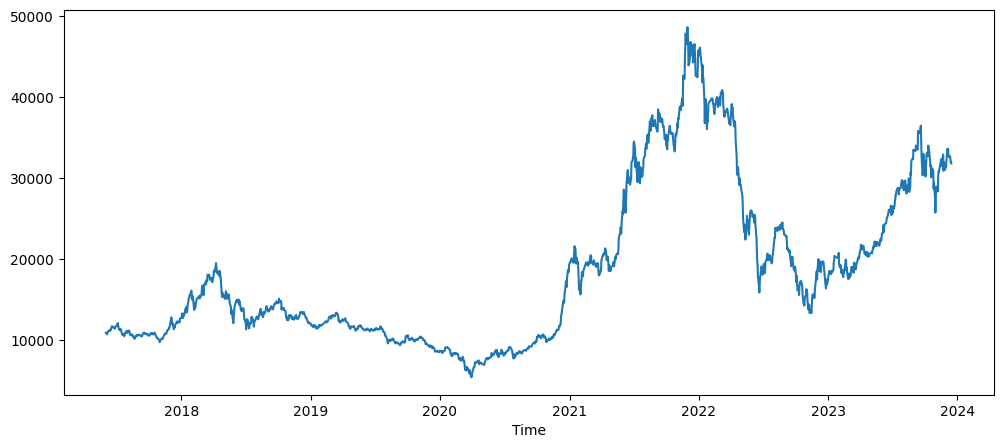

In [4]:
# Import data
SSI = stock_historical_data(symbol = "SSI", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(SSI['Close']))
print(pd.DataFrame(SSI.head(6)))
train_dates = SSI.index
plt.figure(figsize=(12, 5))
SSI["Close"].plot()

In [5]:
SSI = SSI.reset_index(drop = True)
df = SSI['Close']
df

0       10950
1       10740
2       10870
3       10980
4       11060
        ...  
1634    32700
1635    32600
1636    32000
1637    32000
1638    31800
Name: Close, Length: 1639, dtype: int64

In [6]:
from PyEMD import EMD, CEEMDAN

In [7]:
#ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)
ceemdan = CEEMDAN(epsilon=0.005, range_thr = 0.005)
ceemdan.noise_seed(seed = 1)
cIMFs = ceemdan.ceemdan(S=np.array(df.values), T= np.array(df.index))

In [8]:
pd.DataFrame(cIMFs.T, columns = ["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7
0,63.563198,-31.446556,-578.370793,237.284809,1598.307009,-690.487249,10351.149583
1,-85.467479,-80.108393,-591.659003,235.357493,1600.293376,-690.502618,10352.086623
2,6.021803,-54.194742,-579.519216,233.264793,1601.249008,-689.848992,10353.027346
3,29.536114,-2.760097,-544.405492,231.024758,1601.153914,-688.520924,10353.971727
4,6.060483,48.228454,-491.319547,228.632951,1599.991423,-686.513613,10354.919848
...,...,...,...,...,...,...,...
1634,59.914339,-422.795828,66.682244,2446.210194,13536.687102,-14424.309669,31437.611619
1635,151.040251,-481.335698,-90.254109,2479.637724,13501.152758,-14395.113775,31434.872850
1636,-144.087335,-657.646347,-211.214025,2478.020670,13468.506280,-14365.669619,31432.090376
1637,135.332656,-840.307538,-263.787688,2436.788837,13438.690516,-14335.981029,31429.264245


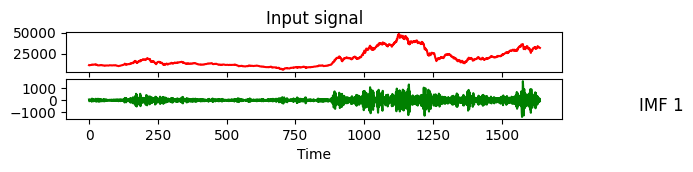

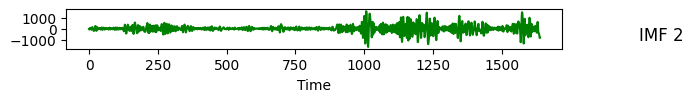

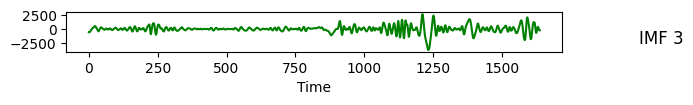

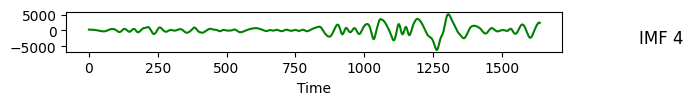

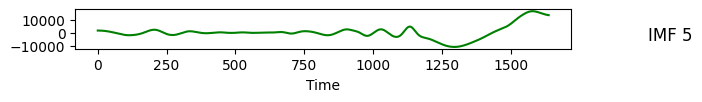

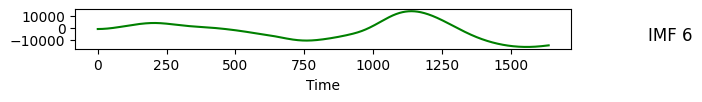

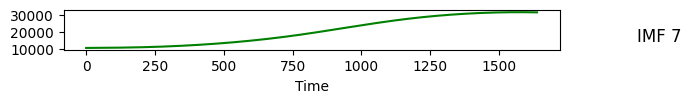

In [9]:
N = cIMFs.shape[0]+1
# Plot results
plt.subplot(N,1,1)
plt.plot(df.index, df.values, 'r')
plt.title("Input signal")
plt.xlabel("Time")

for n, imf in enumerate(cIMFs):
  plt.subplot(N,1,n+2)
  plt.plot(df.index, imf, 'g')
  plt.title("IMF "+str(n+1), x=1.2, y = 0)
  plt.xlabel("Time")
  plt.show()

In [10]:
# Tính residue
scIMF = cIMFs.sum(axis = 0).reshape(-1, 1)
residue = (np.array(df)-cIMFs.sum(axis = 0)).reshape(-1,1)

print("sIMF:", scIMF.shape)
print("Residue:", residue.shape)

sIMF: (1639, 1)
Residue: (1639, 1)


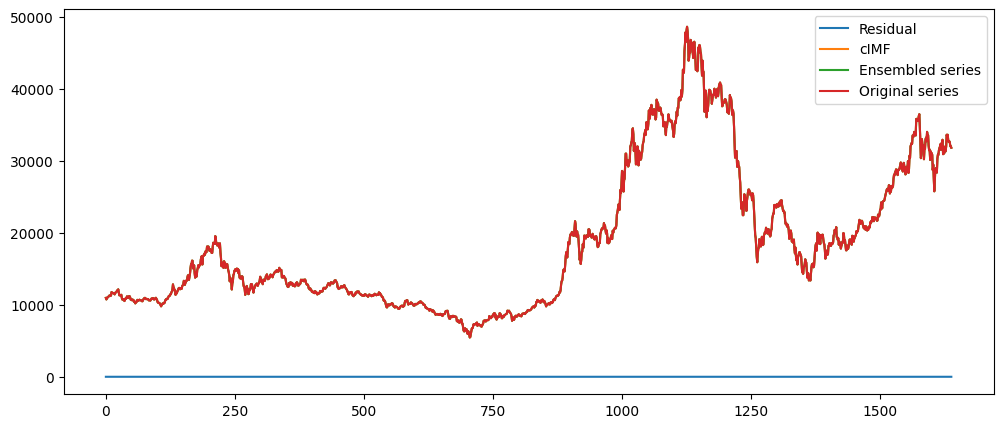

In [11]:
plt.figure(figsize=(12,5))
plt.plot(range(0,len(df)), residue)
plt.plot(range(0,len(df)), scIMF)
plt.plot(range(0,len(df)), scIMF+residue)
plt.plot(df)
plt.legend(["Residual", "cIMF", "Ensembled series", "Original series"])

plt.show()

In [12]:
# load các thư viện cần thiết
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [13]:
# Scale data to 0-1
scaler = MinMaxScaler(feature_range=(0,1))
def Scaling (data):
    IMFscale = scaler.fit_transform(np.array(data))

    return IMFscale
cIMFs_t = cIMFs.T
IMFscale = Scaling(cIMFs_t)

(1639, 7)
Train:  (1376, 7)
Test:  (263, 7)


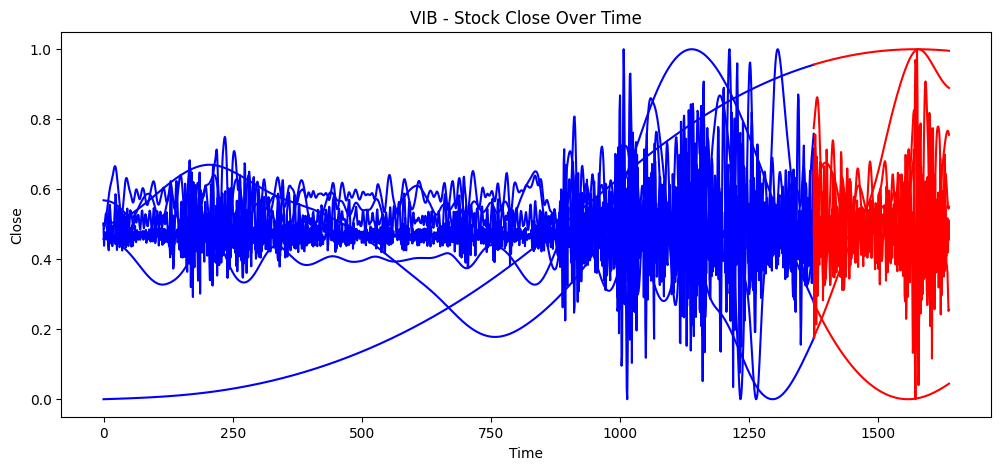

In [14]:
print(IMFscale.shape)
# Chia train test
train_size = int(0.84*IMFscale.shape[0])
test_size = int(0.16*IMFscale.shape[0])
train_data = IMFscale[:train_size]
test_data = IMFscale[train_size:]

print("Train: ", train_data.shape)
print("Test: ", test_data.shape)

# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b')
plt.plot(range(train_size-1,  train_size+test_size), test_data, linestyle='-',  color='r')

plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.show()

In [15]:
# Train X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly

trainX = []
trainY = []

n_past = 30
n_future = 1

for i in range(n_past, len(train_data) - n_future + 1):
    past_sequence = train_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = train_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    trainX.append(past_sequence)
    trainY.append(future_sequence)

trainX, trainY = np.array(trainX), np.array(trainY)
trainY = trainY.reshape(trainY.shape[0], trainY.shape[2])

print("X train: ", trainX.shape)
print("Y train: ", trainY.shape)

X train:  (1346, 30, 7)
Y train:  (1346, 7)


In [16]:
# Test X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly
testX = []
testY = []

for i in range(n_past, len(test_data) - n_future + 1):
    past_sequence = test_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = test_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    testX.append(past_sequence)
    testY.append(future_sequence)

testX, testY = np.array(testX), np.array(testY)
testY = testY.reshape(testY.shape[0], testY.shape[2])

print("X test: ", testX.shape)
print("Y test: ", testY.shape)

X test:  (233, 30, 7)
Y test:  (233, 7)


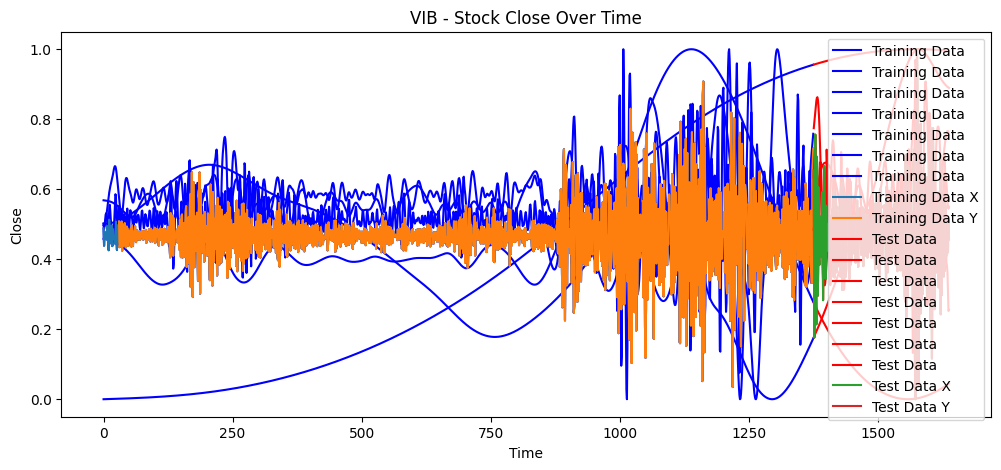

In [17]:
# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size-n_past), trainX[:,0,0], linestyle='-', label='Training Data X')
plt.plot(range(n_past,train_size), trainY[:,0], linestyle='-', label='Training Data Y')
plt.plot(range(train_size, train_size+test_size+1), test_data, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size, train_size+test_size-n_past+1), testX[:,0,0], linestyle='-',  label='Test Data X')
plt.plot(range(train_size+n_past, train_size+test_size+1), testY[:,0], linestyle='-', label='Test Data Y')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

In [22]:
# Tạo model lstm cho việc training
## kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01),
               ##bias_regularizer=l2(0.01),
model = Sequential()
model.add(LSTM(64, activation='relu',

               input_shape=(trainX.shape[1], trainX.shape[2]),

               return_sequences=True))
model.add(LSTM(32, activation='relu',

               return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainX.shape[2]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 31079 (121.40 KB)
Trainable params: 31079 (121.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
history = model.fit(trainX, trainY,epochs = 50, batch_size = 8, validation_split = 0.2, verbose=1)

Epoch 1/50
135/135 [==============================] - 7s 32ms/step - loss: 0.0671 - val_loss: 0.0593
Epoch 2/50
135/135 [==============================] - 5s 34ms/step - loss: 0.0230 - val_loss: 0.0420
Epoch 3/50
135/135 [==============================] - 4s 27ms/step - loss: 0.0153 - val_loss: 0.0390
Epoch 4/50
135/135 [==============================] - 4s 27ms/step - loss: 0.0109 - val_loss: 0.0370
Epoch 5/50
135/135 [==============================] - 5s 37ms/step - loss: 0.0102 - val_loss: 0.0385
Epoch 6/50
135/135 [==============================] - 4s 27ms/step - loss: 0.0089 - val_loss: 0.0371
Epoch 7/50
135/135 [==============================] - 4s 27ms/step - loss: 0.0075 - val_loss: 0.0351
Epoch 8/50
135/135 [==============================] - 4s 32ms/step - loss: 0.0072 - val_loss: 0.0338
Epoch 9/50
135/135 [==============================] - 4s 32ms/step - loss: 0.0064 - val_loss: 0.0342
Epoch 10/50
135/135 [==============================] - 4s 27ms/step - loss: 0.0062 - val_lo

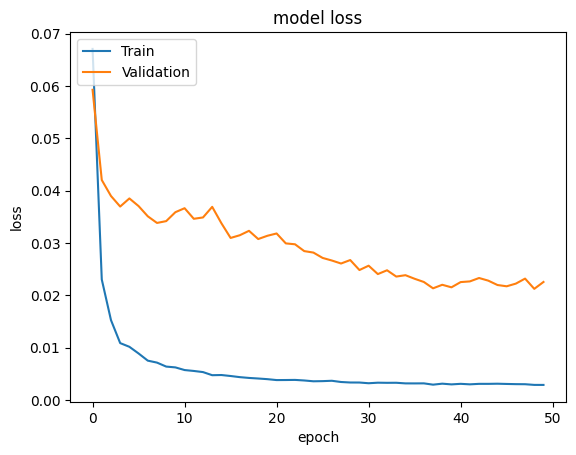

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
testY.shape

(233, 7)

In [26]:
prediction = model.predict(testX)
prediction_copies = np.repeat(prediction, train_data.shape[1], axis=-1)
print(prediction_copies.shape)
y_pred_future = scaler.inverse_transform(prediction)[:]
print(y_pred_future.shape)

8/8 [==============================] - 1s 17ms/step
(233, 49)
(233, 7)


In [27]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

In [28]:
train_sum = train_back.sum(axis = 1).reshape(-1, 1)
test_sum = test_back.sum(axis = 1).reshape(-1, 1)
pred_sum = y_pred_future.sum(axis=1).reshape(-1, 1)


print (train_sum.shape)
print(test_sum.shape)
print(pred_sum.shape)
print(pred_sum)

(1376, 1)
(263, 1)
(233, 1)
[[23020.775]
 [22756.309]
 [22626.77 ]
 [22748.242]
 [23132.408]
 [23534.936]
 [23885.816]
 [23880.953]
 [23658.016]
 [23372.025]
 [22996.92 ]
 [22533.35 ]
 [22020.127]
 [21568.045]
 [21197.316]
 [20890.188]
 [20719.547]
 [20671.393]
 [20717.105]
 [20874.453]
 [21123.674]
 [21441.867]
 [21769.625]
 [22129.373]
 [22419.254]
 [22527.05 ]
 [22515.629]
 [22248.762]
 [21907.355]
 [21667.902]
 [21579.281]
 [21643.703]
 [21807.414]
 [22025.773]
 [22320.984]
 [22583.664]
 [22690.77 ]
 [22573.225]
 [22228.893]
 [21703.236]
 [21240.098]
 [20850.906]
 [20532.945]
 [20140.877]
 [19981.75 ]
 [19979.312]
 [20057.08 ]
 [20140.402]
 [20320.602]
 [20498.537]
 [20605.902]
 [20604.285]
 [20541.902]
 [20501.066]
 [20432.328]
 [20352.59 ]
 [20284.244]
 [20292.748]
 [20307.469]
 [20396.9  ]
 [20547.836]
 [20708.082]
 [20869.26 ]
 [21022.814]
 [21135.578]
 [21217.453]
 [21311.973]
 [21423.6  ]
 [21506.244]
 [21624.406]
 [21835.535]
 [22004.844]
 [22183.168]
 [22328.004]
 [22467.42

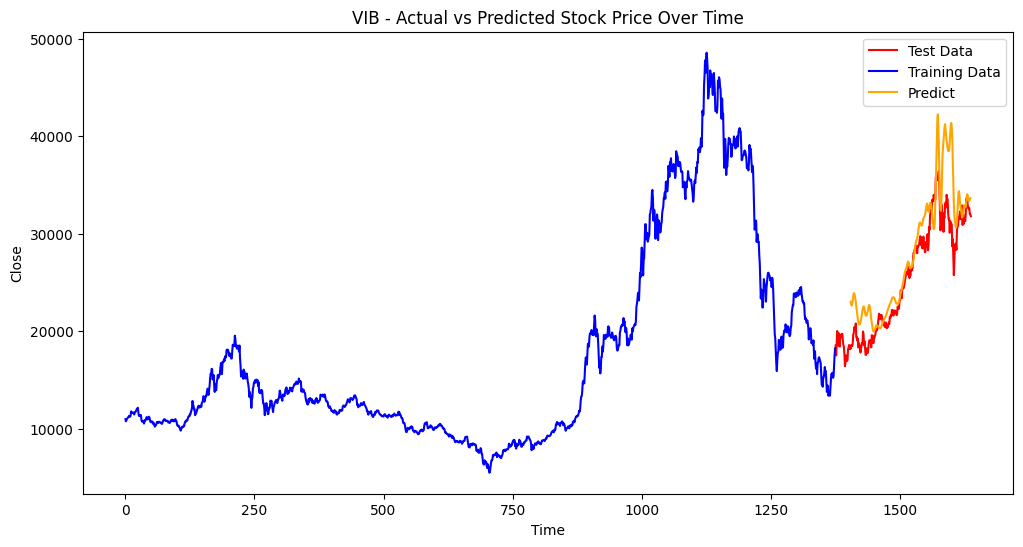

In [29]:
plt.figure(figsize=(12, 6))
n_future = 30

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# # Plot predicted values
#plt.plot( test_Date, y_pred, label='Predicted', linestyle='-',  color='b')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [30]:
n_past = 1
n_days_for_prediction= 60

#print(test_data.reshape(1,-1).T.shape)

test_for_forecast = test_data
print("Test: ", test_for_forecast.shape)

x_forecast = []
y_forecast = []

for i in range(n_days_for_prediction):
  # B1 Duyệt dữ liệu test n ngày gần nhất => bỏ vào x tạm
  x = np.array(test_for_forecast[(-15):])
  print("X shape:",x.shape)
  x = x.reshape(1, x.shape[0], x.shape[1])
  print("X reshape: ",x.shape)

  # B2 dùng predict để chạy 1 ngày
  y = model.predict(x)
  print("Y shape:", y.shape)
  # B3 thêm data ngày đó vào y_forecast, test_for_forecast và append x vào x_forecast
  #y_c = np.repeat(y, train_data.shape[1], axis=-1)
  #print("Y copied:",y_c.shape)
  y_pr = scaler.inverse_transform(y)[:]

  x_forecast.append(x)
  y_forecast.append(y_pr)
  test_for_forecast = np.append(test_for_forecast, y).reshape(-1, 7)
  print(test_for_forecast.shape)
  #test_for_forecast.append(y)
  # B4 lặp lại đến ngày thứ 60

x_forecast = np.array(x_forecast)
y_forecast = np.array(y_forecast)

Test:  (263, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 311ms/step
Y shape: (1, 7)
(264, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 25ms/step
Y shape: (1, 7)
(265, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 23ms/step
Y shape: (1, 7)
(266, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 25ms/step
Y shape: (1, 7)
(267, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 25ms/step
Y shape: (1, 7)
(268, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 27ms/step
Y shape: (1, 7)
(269, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 27ms/step
Y shape: (1, 7)
(270, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 25ms/step
Y shape: (1, 7)
(271, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==

In [31]:
print(y_forecast)

[[[ 1.34534973e+02  3.30533600e+02  5.77677002e+02  3.02535034e+02
    9.64663965e+03 -5.33287305e+03  2.78191680e+04]]

 [[ 1.44673096e+02  3.45563110e+02  5.75979614e+02  1.90303249e+01
    1.01906260e+04 -4.73561914e+03  2.84717988e+04]]

 [[ 1.51856277e+02  3.39028381e+02  5.10674713e+02 -4.44326233e+02
    1.04929248e+04 -3.63844043e+03  2.94130352e+04]]

 [[ 1.55976532e+02  3.18910706e+02  4.14754974e+02 -9.81455078e+02
    1.06065615e+04 -2.30427026e+03  3.05156328e+04]]

 [[ 1.56862137e+02  2.87398712e+02  2.98512817e+02 -1.60021765e+03
    1.05399014e+04 -9.13545044e+02  3.17129785e+04]]

 [[ 1.56060638e+02  2.47816620e+02  1.68717300e+02 -2.23390454e+03
    1.03181113e+04  5.09851257e+02  3.30178789e+04]]

 [[ 1.51806778e+02  1.99937256e+02  2.82449818e+01 -2.84661401e+03
    9.86306738e+03  1.86233704e+03  3.42814961e+04]]

 [[ 1.48907043e+02  1.59748627e+02 -8.88319016e+01 -3.36922803e+03
    9.47526855e+03  3.07850391e+03  3.54408672e+04]]

 [[ 1.44842361e+02  1.25542603e+

In [32]:
forecast_sum = y_forecast.sum(axis = -1)
print(forecast_sum.shape)

(60, 1)


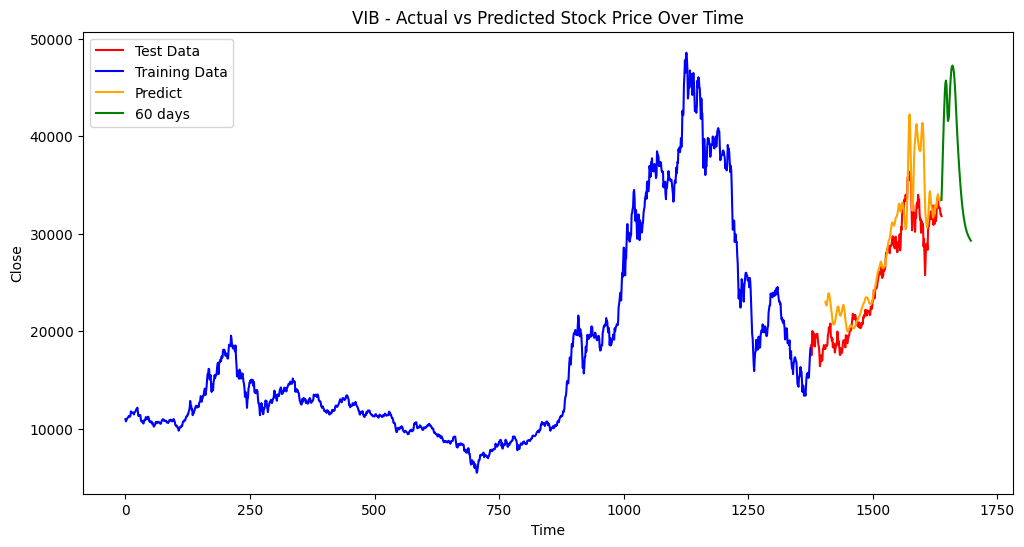

In [33]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# Plot 60 days
plt.plot(range(train_size+test_size, train_size+test_size+60), forecast_sum, linestyle='-', color='green', label='60 days')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [34]:
def RSME (data1, data2):
    return np.sqrt(np.mean((data1-data2)*(data1-data2)))
def MAE (data1, data2):
    return np.mean(np.absolute(data1-data2))
def MAPE (pred, actual):
    return np.mean(np.absolute((pred-actual)/actual))*100
def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))

print("RSME: ", RSME(pred_sum, test_sum[n_future:]))
print("MAE: ", MAE(pred_sum, test_sum[n_future:]))
print("MAPE: ", MAPE(pred_sum, test_sum[n_future:]))
print("MSLR: ", MSLE(pred_sum, test_sum[n_future:]))

RSME:  3336.9196691145053
MAE:  2379.997476864271
MAPE:  9.287355380653992
MSLR:  0.012958894767990031
